In [30]:
import time, sys
# Settings

# bpm = [40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 63, 66, 69, 72, 76, 80, 84, 88, 92, 96, 100, 104, 108, 112, 116, 120, 126, 132, 138, 144, 152, 160, 168, 176, 184, 192, 200, 208]

# name between 40 and 60 = slow

named_bpm = {
    'largo': [40, 42, 44, 46, 48, 50, 52, 54, 56, 58],
    'larghetto': [60, 63],
    'adagio': [66, 69, 72],
    'andante': [76, 80, 84, 92, 96, 100, 104],
    'moderato': [108, 112, 116],
    'allegro': [120, 126, 132, 138, 144, 152, 160],
    'presto': [168, 176, 184, 192],
    'prestissimo': [200, 208]
}

# array of all possible bpm
bpm = []
for key in named_bpm:
    bpm += named_bpm[key]

# array of all possible
# print(bpm)

beats = [2, 3, 4]

def get_milliseconds(bpm):
    # 60 seconds in a minute
    # x bpm = x beats per minute
    # 60 / x = 1 beat per x seconds
    # count number of milliseconds between beats
    return 60 / bpm * 1000
    
def launch_metronome(bpm, beats=4):
    # get milliseconds between beats
    ms_btw_beats = get_milliseconds(bpm)  
    beats = beats - 1
    # start metronome
    while True:
        print('0', end="---"),
        time.sleep(ms_btw_beats / 1000)
        for i in range(beats):
            print('x', end="---")
            time.sleep(ms_btw_beats / 1000)      
        print('|')   

print(get_milliseconds(208))

# launch_metronome(140)




288.46153846153845


In [22]:
!pip3 install svgwrite


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip


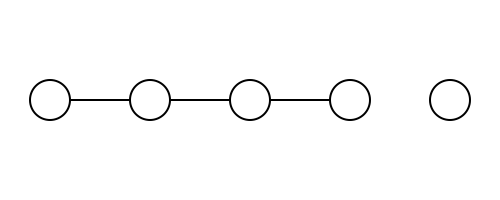

In [63]:
import svgwrite

# Ajout des cercles
circle_count = 6  # Nombre de cercles à ajouter
circle_spacing = 100  # Espacement horizontal entre les cercles
circle_radius = 20  # Rayon des cercles
circle_fill = 'white'  # Couleur de remplissage des cercles
circle_stroke = 'black'  # Couleur de la bordure des cercles
circle_stroke_width = 2  # Épaisseur de la bordure des cercles


# Création du dessin SVG avec une taille de 500x200
dwg = svgwrite.Drawing(filename='output.svg', size=('500px', '200px'))

# Définition de la ligne principale
line = dwg.line((50, 100), (350, 100), stroke='black', stroke_width=2)
dwg.add(line)

for i in range(circle_count):
    animation_id = 'line1a' + str(i + 1)
    animation_from = 50 + i * circle_spacing
    antimation_to = 150 + i * circle_spacing
    animation_dur = '500ms'
    if i == 0:
        animation_begin = "0s;" + animation_id + '.end'
    else:
        animation_begin = 'line1a' + str(i) + '.end'
    # begin = "0s;circle1a4.end" dur="500ms" fill="freeze"
    animate = dwg.animate(attributeName='x2', 
                          id=animation_id,
                          fill="freeze", 
                          dur=animation_dur,
                            from_=animation_from,
                            to=antimation_to,
                            begin=animation_begin
                          )
    line.add(animate)

    # <animate id="line1a1" attributeName="x2" from="50" to="150" dur="500ms" fill="freeze" begin="0ms;line1a4.end" />

    # <animate attributeName="x2" dur="0.5s" repeatCount="indefinite"/>



for i in range(circle_count):
    cx = 50 + i * circle_spacing
    circle = dwg.circle(center=(cx, 100),
                        r=circle_radius,
                        fill=circle_fill,
                        stroke=circle_stroke,
                        stroke_width=circle_stroke_width
                        )
    dwg.add(circle)

    # Ajouter une animation de changement de couleur pour chaque cercle
    # animation_dur = str(0.5 + i * 0.25) + 's'  # Durée de l'animation en fonction de l'indice du cercle
    # animation_begin = str(i * 0.5) + 's'  # Début de l'animation en fonction de l'indice du cercle
    # animation_values = ';'.join([circle_fill, 'red', circle_fill])  # Valeurs de couleur pour l'animation

    # animate = dwg.animate(attributeName='fill', dur=animation_dur, values=animation_values,
    #                       begin=animation_begin, repeatCount='indefinite')
    # circle.add(animate)

# Enregistrer le dessin SVG dans un fichier
dwg.save()

# pretty print svg
!xmllint --format output.svg --output output.svg


# show svg
from IPython.display import SVG, display
display(SVG('output.svg'))
